# Metody Inteligencji Obliczeniowej w Analizie Danych

[Tasks](https://pages.mini.pw.edu.pl/~karwowskij/mioad/lab-sieci.html)

### Lab 2/3:  Implementacja propagacji wstecznej błędu (2 tygodnie, 4 punkty)

W ramach tego laboratorium trzeba zaimplementować uczenie sieci neuronowej propagacją wsteczną błędu.


Aby sprawdzić implementację, należy wykonać uczenie na prostych danych do uczenia dostarczonych na
zajęciach. Następnie należy zaimplementować metodę wizualizacji wartości wag sieci w kolejnych iteracjach
i, w przypadku gdy nie udaje się nauczyć sieci, spróbować wykorzystać te wizualizacje do ustalenia
przyczyny problemu. Zaimplementować wersję z aktualizacją wag po prezentacji wszystkich wzorców i
wersję z aktualizacją po prezentacji kolejnych porcji (batch). Porównać szybkość uczenia dla każdego z
wariantów.

Inicjować wagi z rozkładu jednostajnego na przedziale [0,1]. Opcjonalnie zaimplementować inną metodą
inicjowania wag. Albo metodę He albo Xavier.

Przetestować uczenie sieci na następujących zbiorach (w nawiasach wartość MSE, aby otrzymać 4 punkty):
- square-simple (jeśli sieć nie jest w stanie się nauczyć tej funkcji to coś jest bardzo źle zrobione, MSE:
4),
- steps-small (MSE: 4),
- multimodal-large (MSE: 40).
(Wartości MSE liczone na nieznormalizowanych danych)

#### TODO:

- ~~change the weights initialization to uniform(0,1), Xavier or He~~
- implemnent cost function for MSE
- ~~implement gradients for activation functions~~
- ~~implement backpropagation without bias~~
- ~~implement backpropagation with bias~~
- implement batch learning
- implement visualization
- implement visualization for batch learning
- compare learning speed with and without batch learning


In [1]:
from MultiLayerPerceptron import NeuralNetwork, Layer
import pandas as pd
import numpy as np

## Dataset 1: Square Simple

In [68]:
df_train = pd.read_csv('data/regression/square-simple-training.csv').set_index("Unnamed: 0")#.sample(frac=1).reset_index(drop=True)
df_test = pd.read_csv('data/regression/square-simple-test.csv').set_index("Unnamed: 0")#.sample(frac=1).reset_index(drop=True)
print(df_test.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

                   x           y
Unnamed: 0                      
1          -0.980437  -43.486918
2          -1.219074    3.752808
3           0.124243 -128.610721
4           1.227789    5.671828
5           1.067348  -27.469169


#### Model 1: 1 hidden layer with 5 neurons

In [69]:
net1 = NeuralNetwork(weights_randomizer='uniform')
net1.add(Layer(neurons_count=1, add_bias=True))
net1.add(Layer(neurons_count=5, activation_fun="sigmoid", add_bias=True))
net1.add(Layer(neurons_count=1, activation_fun="linear", add_bias=False))
# print(net1_1_5_1)

Epoch:    1/2000,   MSE train:10248.375,   MSE test: 8866.927
Epoch:  201/2000,   MSE train: 5289.363,   MSE test: 3783.157
Epoch:  401/2000,   MSE train: 4151.237,   MSE test: 2972.373
Epoch:  601/2000,   MSE train: 3524.937,   MSE test: 2557.302
Epoch:  801/2000,   MSE train:  3139.02,   MSE test: 2299.092
Epoch: 1001/2000,   MSE train: 2881.256,   MSE test: 2134.902
Epoch: 1201/2000,   MSE train: 2705.263,   MSE test: 2027.693
Epoch: 1401/2000,   MSE train: 2584.299,   MSE test: 1956.306
Epoch: 1601/2000,   MSE train: 2500.949,   MSE test: 1908.023
Epoch: 1801/2000,   MSE train: 2443.093,   MSE test: 1874.514
Epoch: 2000/2000,   MSE train: 2402.342,   MSE test:  1849.45


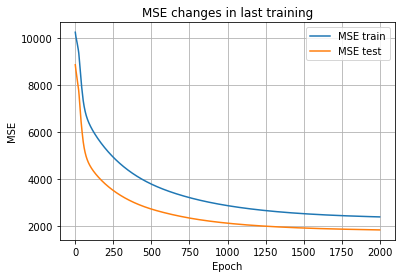

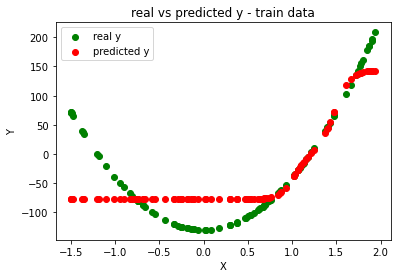

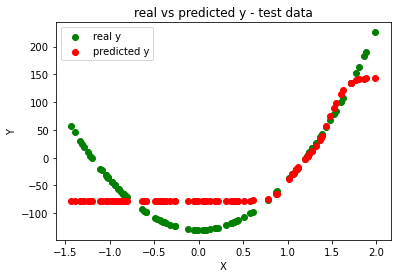

In [70]:
net1.train(x_train, y_train,x_test,y_test, epochs=2000, learning_rate=0.0001, batch_size=1)
net1.plot_training_history()
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color="green",label="real y")
plt.scatter(x_train, net1.predict(x_train), color="red",label="predicted y")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("real vs predicted y - train data")
plt.show()

plt.scatter(x_test, y_test, color="green",label="real y")
plt.scatter(x_test, net1.predict(x_test), color="red",label="predicted y")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("real vs predicted y - test data")
plt.show()

## Dataset 2: Steps Small

In [41]:
df_train = pd.read_csv('data/regression/steps-small-training.csv').set_index("Unnamed: 0")
df_test = pd.read_csv('data/regression/steps-small-test.csv').set_index("Unnamed: 0")
print(df_train.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

                   x    y
Unnamed: 0               
1           1.786896  160
2           1.189037   80
3          -0.917923  -80
4          -0.518967  -80
5          -0.011570    0


#### Model 1: 1 hidden layers with 5 neurons

In [55]:
net2 = NeuralNetwork()
net2.add(Layer(neurons_count=1, add_bias=True))
net2.add(Layer(neurons_count=5, activation_fun='sigmoid', add_bias=True))
net2.add(Layer(neurons_count=1, activation_fun='linear', add_bias=False))

Epoch:    1/5000,   MSE train: 6510.205,   MSE test:  7859.56
Epoch:  501/5000,   MSE train: 1504.413,   MSE test: 1716.701
Epoch: 1001/5000,   MSE train:  753.231,   MSE test:  858.244
Epoch: 1501/5000,   MSE train:  407.492,   MSE test:  490.267
Epoch: 2001/5000,   MSE train:  256.313,   MSE test:  331.107
Epoch: 2501/5000,   MSE train:  175.362,   MSE test:  252.004
Epoch: 3001/5000,   MSE train:  132.361,   MSE test:  212.881
Epoch: 3501/5000,   MSE train:  108.163,   MSE test:  192.134
Epoch: 4001/5000,   MSE train:    93.11,   MSE test:  179.687
Epoch: 4501/5000,   MSE train:   82.727,   MSE test:  171.299
Epoch: 5000/5000,   MSE train:   74.904,   MSE test:  165.075


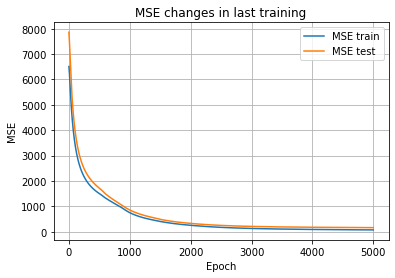

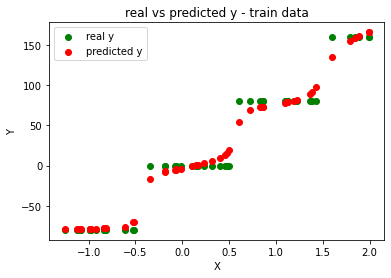

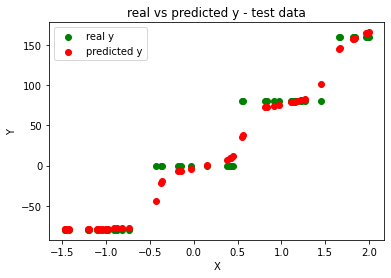

In [56]:
net2.train(x_train, y_train,x_test,y_test, epochs=5000, learning_rate=0.0001, batch_size=1)
net2.plot_training_history()
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color="green",label="real y")
plt.scatter(x_train, net2.predict(x_train), color="red",label="predicted y")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("real vs predicted y - train data")
plt.show()

plt.scatter(x_test, y_test, color="green",label="real y")
plt.scatter(x_test, net2.predict(x_test), color="red",label="predicted y")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("real vs predicted y - test data")
plt.show()

## Multimodal Large

In [60]:
df_train = pd.read_csv('data/regression/multimodal-large-test.csv')
df_test = pd.read_csv('data/regression/multimodal-large-training.csv')
print(df_train.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

          x           y
0  0.493292  -98.208166
1 -0.470203  -55.283891
2  1.869983  100.299997
3 -1.040446    2.720629
4 -0.616507  -75.991636


### Model 1: 1 hidden layer with 10 neurons

In [64]:
net2 = NeuralNetwork()
net2.add(Layer(neurons_count=1, add_bias=True))
net2.add(Layer(neurons_count=10, activation_fun='sigmoid', add_bias=True))
net2.add(Layer(neurons_count=1, activation_fun='linear', add_bias=False))

Epoch:    1/50,   MSE train: 2811.069,   MSE test: 2739.974
Epoch:   50/50,   MSE train: 2799.349,   MSE test: 2726.399


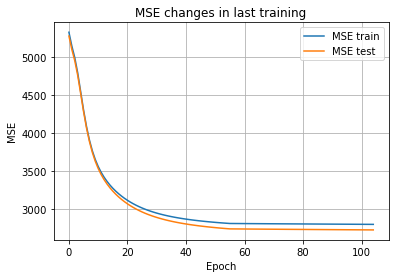

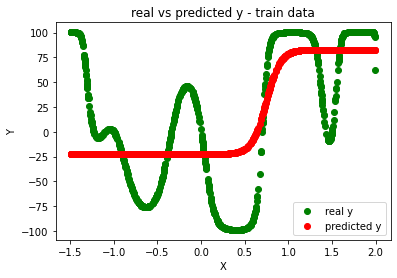

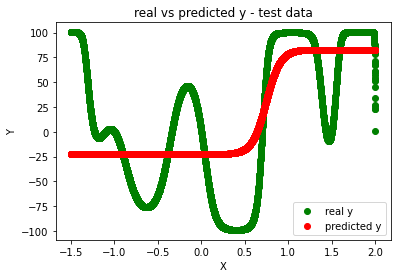

In [67]:
net2.train(x_train, y_train,x_test,y_test, epochs=50, learning_rate=0.00001, batch_size=1)
net2.plot_training_history()
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color="green",label="real y")
plt.scatter(x_train, net2.predict(x_train), color="red",label="predicted y")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("real vs predicted y - train data")
plt.show()

plt.scatter(x_test, y_test, color="green",label="real y")
plt.scatter(x_test, net2.predict(x_test), color="red",label="predicted y")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("real vs predicted y - test data")
plt.show()

#### Results

MSE for the `square simple` dataset is:  
- train: 
- test: 

MSE for the `steps small` dataset is:  
- train: 
- test: 

MSE for the `multimodal large` dataset is:
- train:
- test: